# Load SH insolation

In [12]:
# read the insolation data '65N_inso_mean90_-1Ma_0_inter100.txt'
import pandas as pd
path='D:/VScode/Last_deglaciation/data/inso60S_1Ma_0_inter100_meanlongitude_270.txt'
inso60s=pd.read_csv(path, sep='\s+', header=None)
# rename columns
inso60s.columns=['age', 'insolation']
# age*-1000
inso60s['age']=-1*inso60s['age']*1000
# filp the dataframe
inso60s=inso60s.iloc[::-1]
# convert inso60s to csv
# inso60s.to_csv('D:/VScode/Last_deglaciation/temp/inso60S_1Ma_0_inter100_meanlongitude_270.csv', index=False)
inso60s

,age,insolation
10000,-0.0,511.037082
9999,100.0,511.404930
9998,200.0,511.758942
9997,300.0,512.098589
9996,400.0,512.423324
...,...,...
4,999600.0,464.574426
3,999700.0,464.304934
2,999800.0,464.063080
1,999900.0,463.848860


# Load intergrated summer insolation data

In [55]:
path='D:/VScode/Last_deglaciation/data_fig3/'

# read Huybers P &Denton-2008-NGeo-65S.txt
import pandas as pd
# df_inter_ann = pd.read_csv(path + 'Huybers_Denton_2008_NGeo_65S.txt', sep='\s+', header=0,skiprows=8)
df_inter_ann = pd.read_csv(path + 'j_60south.txt', sep='\s+', header=0,skiprows=8)
# rename column NaN to age
df_inter_ann.rename(columns={'NaN':'age'}, inplace=True)
# age culumn to ka
df_inter_ann['age']=df_inter_ann['age']*1000
df_inter_ann


,age,0,25,50,75,100,125,150,175,200,...,375,400,425,450,475,500,525,550,575,600
0,0,7.439,7.394,7.236,7.096,6.946,6.785,6.610,6.418,6.214,...,4.222,3.817,3.360,2.827,2.167,1.184,0.0,0.0,0.0,0.0
1,1000,7.446,7.396,7.244,7.105,6.957,6.796,6.622,6.433,6.229,...,4.252,3.854,3.404,2.879,2.231,1.311,0.0,0.0,0.0,0.0
2,2000,7.454,7.400,7.253,7.116,6.969,6.809,6.636,6.446,6.244,...,4.273,3.871,3.425,2.903,2.264,1.352,0.0,0.0,0.0,0.0
3,3000,7.461,7.404,7.261,7.126,6.981,6.822,6.648,6.462,6.256,...,4.278,3.879,3.427,2.901,2.253,1.325,0.0,0.0,0.0,0.0
4,4000,7.468,7.410,7.271,7.137,6.993,6.834,6.661,6.475,6.271,...,4.274,3.872,3.409,2.872,2.204,1.259,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,4996000,7.395,7.395,7.190,7.039,6.881,6.712,6.529,6.332,6.120,...,4.067,3.652,3.174,2.611,1.874,0.542,0.0,0.0,0.0,0.0
4997,4997000,7.392,7.392,7.184,7.032,6.872,6.703,6.520,6.323,6.113,...,4.088,3.676,3.212,2.664,1.968,0.823,0.0,0.0,0.0,0.0
4998,4998000,7.389,7.389,7.180,7.027,6.867,6.697,6.515,6.318,6.108,...,4.099,3.693,3.237,2.700,2.020,0.956,0.0,0.0,0.0,0.0
4999,4999000,7.388,7.388,7.178,7.025,6.865,6.695,6.512,6.316,6.107,...,4.103,3.701,3.245,2.712,2.044,1.005,0.0,0.0,0.0,0.0


# Load sat data

In [22]:
import xarray as xr
import numpy as np

data_dir = 'D:/VScode/Last_deglaciation/data'
ds_sat_EOFs_MC = xr.open_dataset(data_dir + '/ds_sat_EOFs_MC.nc')

weight = np.cos(np.deg2rad(ds_sat_EOFs_MC['lat']))
weight = xr.where(weight < 0, 0, weight)

ds_sat_EOFs_MC['weight']=weight

# ds_sat_EOFs_MC.info

In [14]:
import xarray as xr

ds_sat_subset = ds_sat_EOFs_MC.sel(lat=slice(-70, -50))

weights_broadcasted = ds_sat_subset['weight'].broadcast_like(ds_sat_subset['sat'])
sum_weighted_sat = (ds_sat_subset['sat'] * weights_broadcasted).sum(dim=['lat', 'lon'])
sum_weight_sat = weights_broadcasted.sum(dim=['lat', 'lon'])

weighted_avg_sat = sum_weighted_sat / sum_weight_sat

# Read SIC data

In [15]:
path='D:/VScode/Last_deglaciation/data/LGMR_SIC_May2023.nc'

# read the nc file from the path
import xarray as xr
import numpy as np

ds_seaice = xr.open_dataset(path)
ds_seaice = ds_seaice.where(ds_seaice.age>=11000, drop=True)

# Calculate the weight based on latitude
weight = np.cos(np.deg2rad(ds_seaice['lat']))
print('shape of the weight:', weight.shape)

weight = xr.where(weight < 0, 0, weight)

ds_seaice['weight'] = weight



ds_seaice.info

shape of the weight: (96,)


c:\Users\zps19\.conda\envs\pz-env\lib\site-packages\xarray\coding\variables.py:148: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
c:\Users\zps19\.conda\envs\pz-env\lib\site-packages\xarray\coding\variables.py:148: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv


<bound method Dataset.info of <xarray.Dataset>
Dimensions:  (dims: 5, age: 65, lat: 96, lon: 144)
Coordinates:
  * lat      (lat) float32 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * age      (age) float32 1.11e+04 1.13e+04 1.15e+04 ... 2.37e+04 2.39e+04
  * dims     (dims) object 'mean              ' ... '97.5percentile    '
Data variables:
    sic      (dims, age, lat, lon) float32 0.0 0.0 0.0 ... 0.9979 0.9979 0.9979
    weight   (lat) float32 0.0 0.03306 0.06609 0.09905 ... 0.06609 0.03306 0.0>

# Select the SIC data of given latitude band, divide them according to longitude

In [16]:
selected_data = ds_seaice['sic'].isel(dims=1).sel(lat=slice(-70, -50))
weights = ds_seaice['weight'].sel(lat=slice(-70, -50))

weights_expanded = weights.expand_dims(dim={'lon': selected_data.lon, 'age': selected_data.age}, axis=[1, 2])

longitude_step = 60
weighted_avg_sic = {}


for lon in range(0, 360, longitude_step):
    lon_slice = slice(lon, lon + longitude_step)
    data_group = selected_data.sel(lon=lon_slice)
    weights_group = weights_expanded.sel(lon=lon_slice)
    # remove the data from data_group where it is all zero
    data_group = data_group.where(data_group > 0, drop=True)
    # remove the weights from weights_group where data from data_group is all zero
    weights_group = weights_group.where(data_group > 0, drop=True)
    
    # Calculate weighted average
    weighted_avg = (data_group * weights_group).sum(dim=['lat', 'lon']) / weights_group.sum(dim=['lat', 'lon'])
    weighted_avg_sic[f'{lon}-{lon + longitude_step}'] = weighted_avg.values

# print(weighted_avg_sic)

# Load TraCE data

In [32]:
# load the array
path='D:/VScode/Last_deglaciation/data_fig3/'
trace_age=np.load(path+'trace_age.npy')
sat_series_orb=np.load(path+'sat_series_orb.npy')
sat_series_ghg=np.load(path+'sat_series_ghg.npy')
smoothed_sat_orb=np.load(path+'smoothed_sat_orb.npy')
smoothed_sat_ghg=np.load(path+'smoothed_sat_ghg.npy')

# Plot

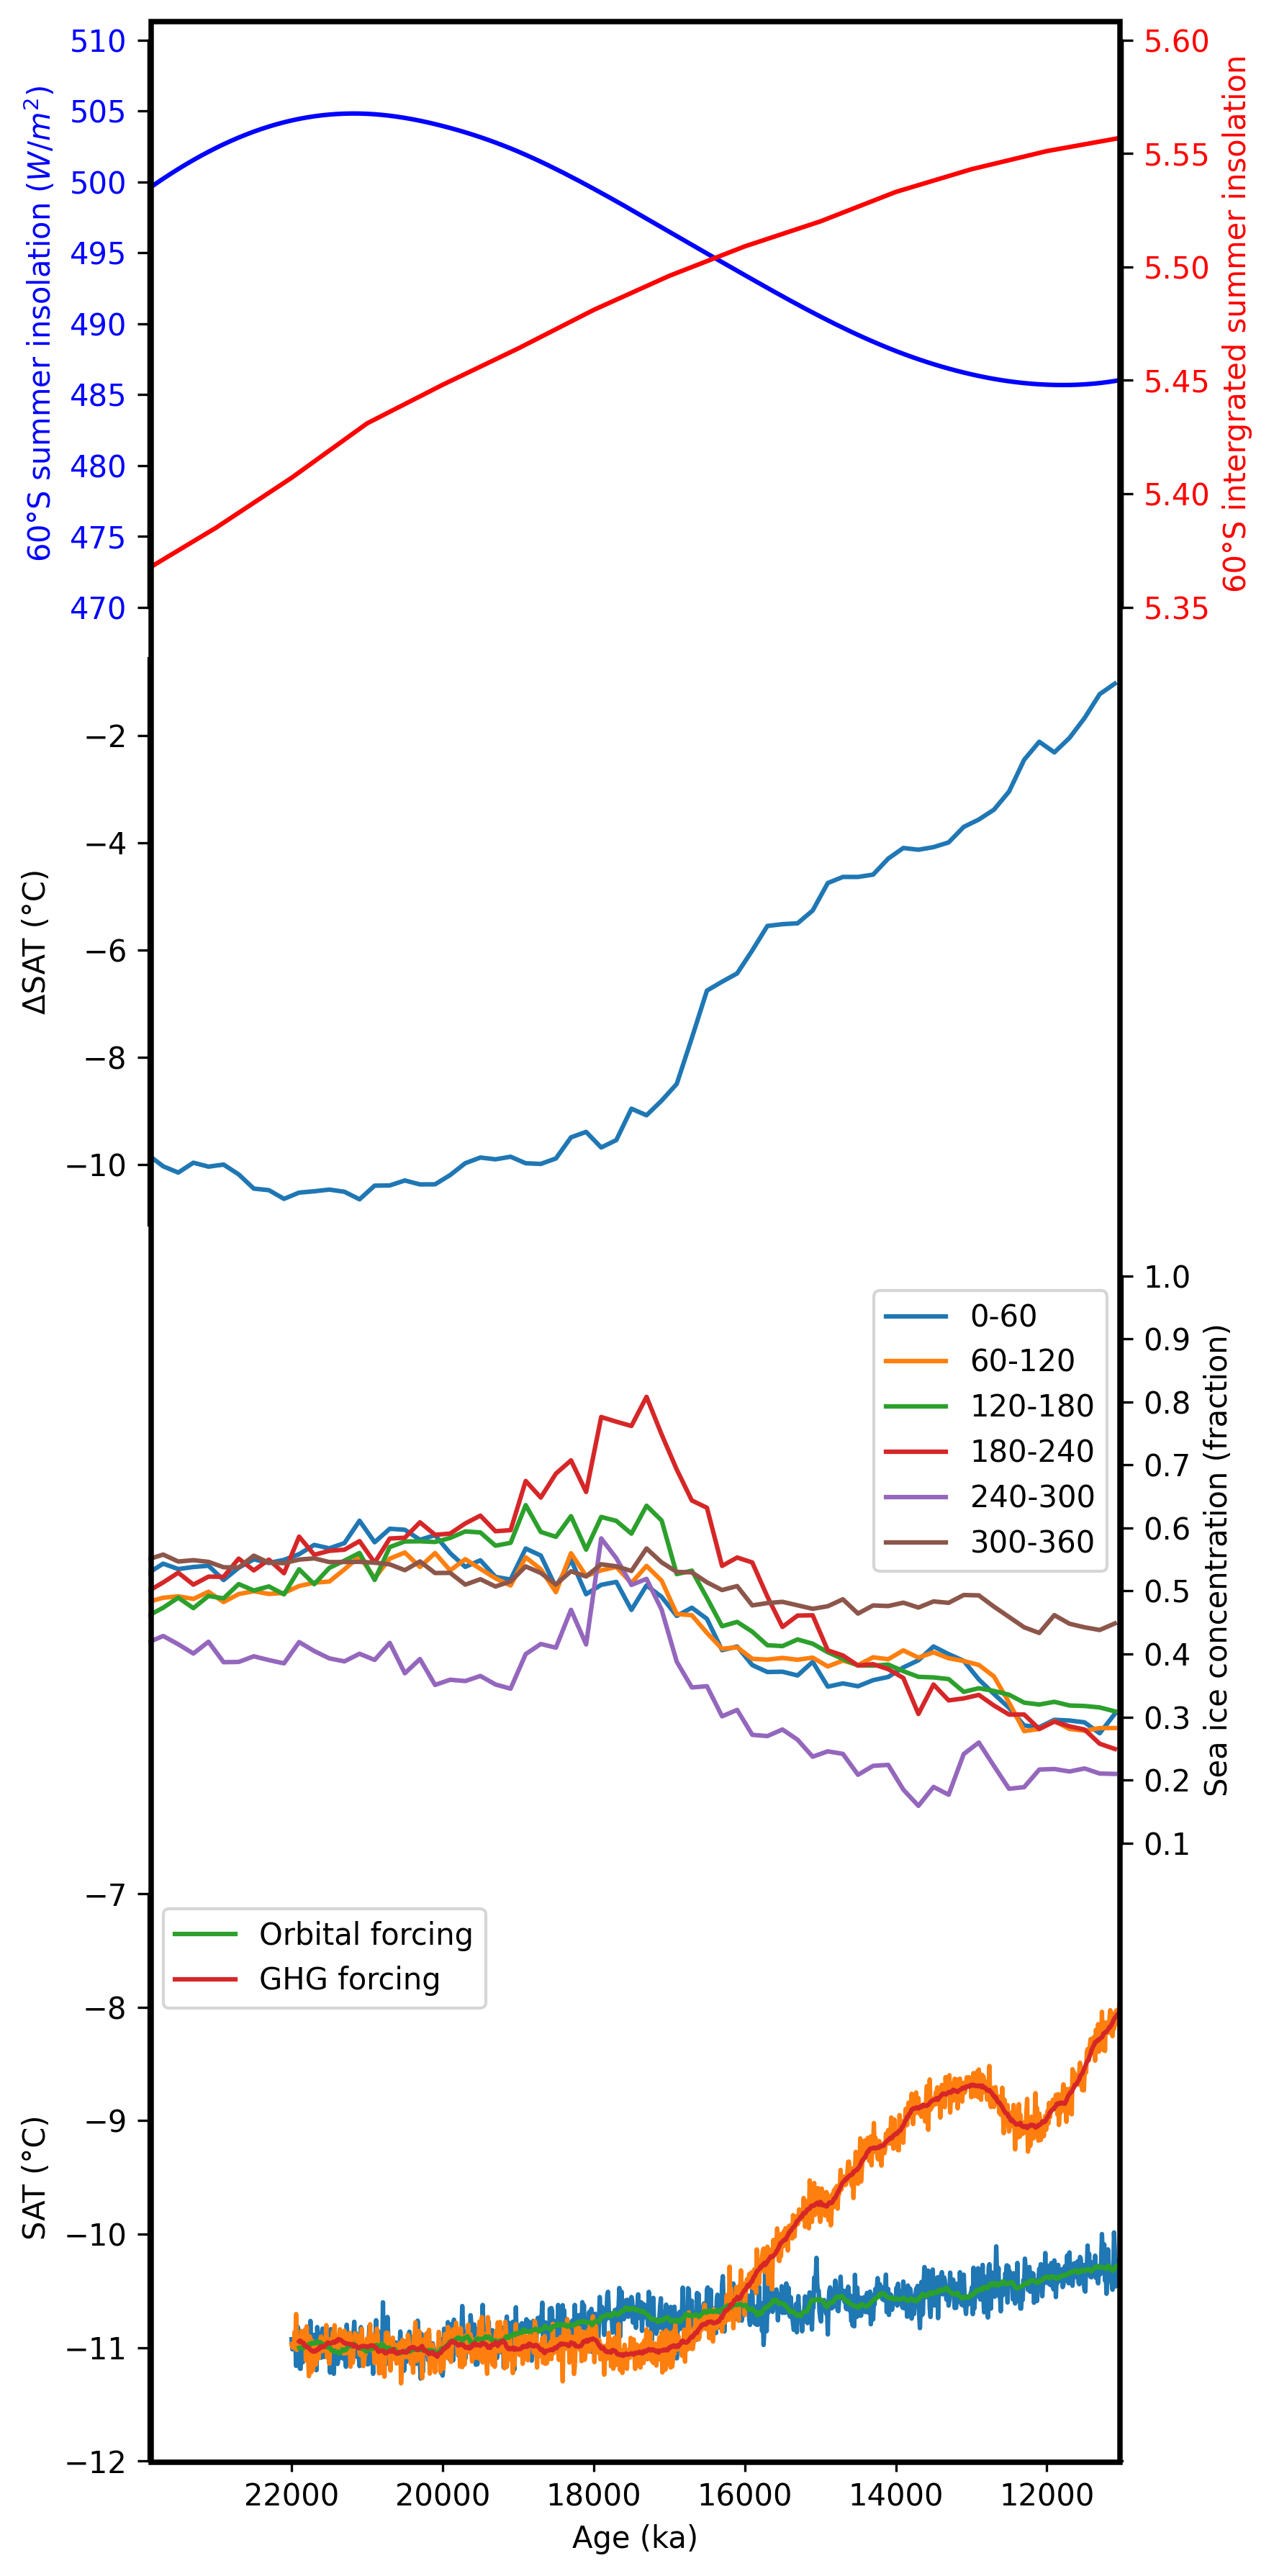

In [102]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches


# Create subplots
fig, axs = plt.subplots(4, 1, figsize=(6, 12), dpi=300,sharex=True)

# First subplot with twin axes
ax1 = axs[0]
ax1.plot(inso60s['age'], inso60s['insolation'], color='blue', label='inso60s insolation')
# set y axis limit
ax1.set_ylim(470, 510)
ax1.set_ylabel('60°S summer insolation ($W/m^2$)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(df_inter_ann['age'], df_inter_ann['275'], color='red', label='df_inter_ann data')
# set y axis limit
ax2.set_ylim(5.35, 5.6)
ax2.set_ylabel('60°S intergrated summer insolation', color='red')
ax2.tick_params(axis='y', labelcolor='red')
# set x axis limit
ax1.set_xlim(23900,11000)
# invert the x axis
# ax1.invert_xaxis()
# remove box
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
# remove xticks
ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)





# Second subplot
axs[1].plot(ds_sat_EOFs_MC['age'], weighted_avg_sat, label='weighted_avg_sat')
axs[1].set_ylabel('ΔSAT (°C)')
axs[1].set_xlim(23900,11000)
# remove boxes
axs[1].spines['top'].set_visible(False)
axs[1].spines['bottom'].set_visible(False)
axs[1].spines['right'].set_visible(False)
# remove xticks
axs[1].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)




# Third subplot

for lon_range, data in weighted_avg_sic.items():
    axs[2].plot(ds_seaice['age'].values, data, label=f'{lon_range}')

axs[2].set_ylabel('Sea ice concentration (fraction)')
# add legend
# axs[2].legend(loc='upper left')
axs[2].set_xlim(23900,11000)
# set y axis limit
axs[2].set_ylim(0.1, 1)

# show y label and ticks on the right
axs[2].yaxis.tick_right()
axs[2].yaxis.set_label_position("right")
# remove boxes
axs[2].spines['top'].set_visible(False)
axs[2].spines['bottom'].set_visible(False)
axs[2].spines['left'].set_visible(False)
# remove xticks
axs[2].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
# invert the x axis
# axs[2].invert_xaxis()




# Last subplot
axs[3].plot(trace_age, sat_series_orb)
axs[3].plot(trace_age, sat_series_ghg)
axs[3].plot(trace_age, smoothed_sat_orb, label='Orbital forcing')
axs[3].plot(trace_age, smoothed_sat_ghg, label='GHG forcing')
# set y axis limit
axs[3].set_ylim(-12, -7)
axs[3].set_ylabel('SAT (°C)')
axs[3].set_xlabel('Age (ka)')
# remove boxes
axs[3].spines['top'].set_visible(False)
axs[3].spines['right'].set_visible(False)

# Legends
# ax1.legend(loc='upper left')
# ax2.legend(loc='upper right')
# axs[1].legend(loc='upper left')
axs[2].legend(loc='upper right')
axs[3].legend(loc='upper left')
# adjust vertical space between subplots
# fig.subplots_adjust(hspace=0)

# # Show plot
# plt.tight_layout()
# plt.show()

# Get the coordinates for the axes
top = axs[0].get_position().y1+0.11
bottom = axs[-1].get_position().y0-0.062
left = axs[0].get_position().x0  # Assuming the left y-axis is used
right = axs[0].get_position().x1-0.027  # Assuming the right y-axis is not extended

# Create a box that connects all y-axes and the top of the first subplot, and the bottom of the last subplot
# The coordinates are adjusted so that the left and right sides of the box align with the y-axis line
box = patches.FancyBboxPatch(
    (left, bottom), right-left, top-bottom,
    transform=fig.transFigure, boxstyle="square,pad=0", 
    ec="black", fc="none", lw=1.8, clip_on=False
)

# Add the box to the figure
fig.patches.extend([box])

# Adjust the layout
plt.tight_layout()

# Show plot
plt.show()
